# CMSE 202 Final S23 (Sect. 003)


### <p style="text-align: right;"> &#9989; Runze Shao</p>
### <p style="text-align: right;"> &#9989; AndersonShaw</p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of a few characteristics of leaves. This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Leaf#). We’ll ask you a set of questions that center the classification of these leaves using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv`

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,classification_report


In [1]:
#Write your code for downloading the data here
! curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3000  100  3000    0     0   4398      0 --:--:-- --:--:-- --:--:--  4398


In [9]:
#Write your code for importing the data here
import pandas as pd
df = pd.read_csv('leaf_data_cleaned.csv')
df

,Class,Elongation,Isoperimetric Factor,Average Contrast
0,1,0.32396,0.83592,0.127950
1,1,0.36116,0.79867,0.090476
2,1,0.38998,0.80812,0.057445
3,1,0.35376,0.81697,0.065491
4,1,0.44462,0.75493,0.045339
...,...,...,...,...
103,10,0.22905,0.71234,0.220410
104,10,0.31283,0.59330,0.260500
105,10,0.27055,0.70006,0.215070
106,10,0.23328,0.67107,0.247440


## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different leaf characteristics. Your visualization should represent each of the different leaf types/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

Text(0.5, 1.0, 'Distributions of Elongation, Isoperimetric Factor, and Average Contrast')

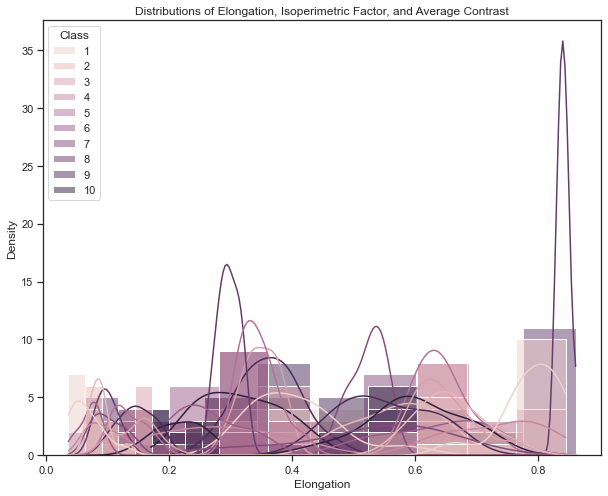

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the histograms and density plots
sns.histplot(df, x="Elongation", hue="Class", kde=True, ax=ax)
sns.histplot(df, x="Isoperimetric Factor", hue="Class", kde=True, ax=ax)
sns.histplot(df, x="Average Contrast", hue="Class", kde=True, ax=ax)

ax.set_ylabel("Density")
ax.set_title("Distributions of Elongation, Isoperimetric Factor, and Average Contrast")


## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (i.e., just by eye), which pair of leaves do you think would be **easiest** for an ML technique to differentiate between? Which pair of leaves do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

Note: There is not necessarily one correct answer to these questions, we are looking for your reasoning!

*Write your answer here*

I think from class 1-6 Elongation is best for ML, because the distribution seems even in this plot. The hardest is class 10, The average contrast figure is way higher in the plot.

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for two classes of leaves that you will try to separate. (You may need to use Google to figure out how to do this.)

Note: the 'Class' column labels are integers, not strings.

In [38]:
#Write your code for selecting your data here
df_class_1 = df[df['Class'].isin([1, 11])]
df_class_2 = df[df['Class'].isin([2, 12])]
# Display the new dataframe
print("Class 1 Clarification",df_class_1)
print("Class 2 Clarification",df_class_2)

Class 1 Clarification     Class  Elongation  Isoperimetric Factor  Average Contrast
0       1     0.32396               0.83592          0.127950
1       1     0.36116               0.79867          0.090476
2       1     0.38998               0.80812          0.057445
3       1     0.35376               0.81697          0.065491
4       1     0.44462               0.75493          0.045339
5       1     0.34284               0.84482          0.058528
6       1     0.44458               0.76770          0.080587
7       1     0.39222               0.80816          0.089686
8       1     0.45693               0.77106          0.040616
9       1     0.58336               0.66419          0.042347
10      1     0.34116               0.83088          0.036511
11      1     0.43387               0.76985          0.057832
Class 2 Clarification     Class  Elongation  Isoperimetric Factor  Average Contrast
12      2     0.64257               0.59851          0.089889
13      2     0.60323     

## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the leaf class identifiers.) Also, set the `random_state` to be 1.

In [39]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split

# Create a new dataframe with two classes of leaves
df_class_1 = df[df['Class'].isin([1, 11])]
df_class_2 = df[df['Class'].isin([2, 12])]
df_new = pd.concat([df_class_1, df_class_2], axis=0)

# Change the class values to 0 and 1
df_new['Class'] = df_new['Class'].replace({1: 0, 11: 0, 2: 1, 12: 1})

# Split the data into training and testing sets
X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. 

**Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge or perfect separation. **It is fine to ignore these warnings.** 

In [47]:
#Write your code for training your model here
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df_new.drop('Class', axis=1)
y = df_new['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the SVM model and fit the data
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=1)

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data. There are not many data points for this set, so you will see small numbers in the Confusion matrix.

In [48]:
#Write your code for determining the accuracy, recall, and precision of your model
y_pred_train = svm.predict(X_train)

# Compute accuracy, precision, and recall
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0


/Users/anderson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

print(model.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                   15
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 May 2023   Pseudo R-squ.:                   1.000
Time:                        18:23:02   Log-Likelihood:            -2.3380e-07
converged:                      False   LL-Null:                       -9.5477
Covariance Type:            nonrobust   LLR p-value:                 0.0002613
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -113.2497   3.48e+05     -0.000      1.000   -6.83e+05    6.82e+05
Elongation             204.6822   2

/Users/anderson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

*Write your answer here*

I think this model is doing an acceptable job of classifyin the data. The accuracy is relatively lower than homework models.n

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University